In [1]:
% matplotlib inline

import h5py as hp
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import scipy.io as sio


In [2]:
# import ostreo abundances
cfname = '/Volumes/sclayton/kuroshio/genomics/ostreo.mat'
f = hp.File(cfname)
print f.keys()

lon = np.array(f['lon'])
lat = np.array(f['lat'])
O = np.array(f['O'])
z = np.array(f['z'])

a1 = np.where(np.logical_and(lon ==143.5,lat ==36.6102))
a1 = a1[1]
xerr = [3409, 775, 25, 28, 69]
nit = [0.900000001,2.271428704,9.442857334,3.064285698,6.58571454] # uMOL

print np.shape(O[0,][a1]), np.shape(z)

[u'#refs#', u'DATA', u'O', u'S', u'SS', u'Smod', u'T', u'TT', u'c', u'chla', u'depths', u'lat', u'lats', u'lon', u'lons', u'm', u'model', u'ostreo', u'salt', u'sigt', u'temp', u'theta', u'turbid', u'z']
(5,) (1, 64)


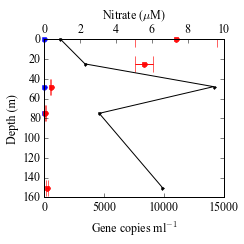

In [19]:
# plot profile at station A1

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
rcParams.update({'font.family': 'serif'})
rcParams.update({'font.serif': 'Times New Roman'})

figs1 = plt.figure(1, figsize=(3.5, 3.5), dpi = 1200)
ax1 = figs1.add_subplot(111)
plt.gca().invert_yaxis()
ax1.plot([0, 0, 0], [0, 48, 75],'.b', markersize=10,clip_on=False,label='Clade OI')
ax1.errorbar(O[1,][a1],z[0,a1], xerr=xerr, fmt='.r', markersize=10, ecolor='red', capsize=8, clip_on=False,label='Clade OII', alpha = 0.75)
plt.xlim([0, 15000])
plt.ylim([160, -1])
plt.ylabel('Depth (m)',fontsize=12)
plt.xlabel('Gene copies ml$^{-1}$',fontsize=12)
plt.xticks([0, 5000, 10000, 15000],fontsize=12)
plt.yticks(fontsize=12)

#legend = plt.legend(loc='center right', shadow=False, fontsize=12)
#legend.draw_frame(False)

ax2 = ax1.twiny()
ax2.plot(nit,z[0,a1],'.-k', clip_on=False)
plt.xlabel('Nitrate ($\mu$M)',fontsize=12)
plt.xticks([0, 2, 4, 6, 8 , 10],fontsize=12)

ax1.errorbar(O[1,][a1],z[0,a1], xerr=xerr, fmt='.r', markersize=10, ecolor='red', capsize=8, clip_on=False,label='Clade OII', alpha = 0.75)

figs1.savefig('/Users/sclayton/Desktop/LO_figS1.tiff', format='tiff', dpi=1200)